In [1]:
import math  as mth
import numpy as np
import matplotlib.pyplot as plt

# Exercise 01

## Fibonacci Series

In [5]:
# Fibonacci Series
fibSer , ratioSer = [1,1] , [1]

for i in range(2,20):
    an = fibSer[i-1] + fibSer[i-2]
    ratio = fibSer[i-1] / an
    fibSer.append(an)
    ratioSer.append(ratio)
    
print(fibSer)
print(ratioSer) # The ratio converge to the golden ratio

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]
[1, 0.5, 0.6666666666666666, 0.6, 0.625, 0.6153846153846154, 0.6190476190476191, 0.6176470588235294, 0.6181818181818182, 0.6179775280898876, 0.6180555555555556, 0.6180257510729614, 0.6180371352785146, 0.6180327868852459, 0.6180344478216818, 0.6180338134001252, 0.6180340557275542, 0.6180339631667066, 0.6180339985218034]


## Elliptic integral

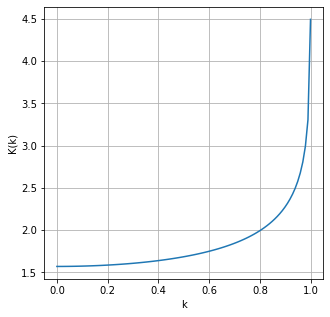

In [6]:
# Elliptic integral
def F(theta, k):
    x = (k*np.sin(theta))**2
    y = (1-x)**(-0.5) 
    return y

def K(k):
# Trapezium Method for integral
    theta   = np.linspace(0, np.pi/2, num=500)
    dtheta  = theta[1] - theta[0]
    F_value = F(theta, k)
    I = ( F_value.sum() - (F_value[0] + F_value[-1])/2 ) * dtheta 
    return I

# Calculate K(k) for k from 0 to 0.999, plot K(k) and save as a txt file
ks = np.linspace(0, 0.999, num=100)
Ks = [K(k) for k in ks]

# Plot
fig = plt.figure( figsize = (5,5) );
plt.plot(ks,Ks);
plt.xlabel('k'); 
plt.ylabel('K(k)');
plt.grid( visible = True );
fig.savefig('./Exercise01_EllipticIntegral.jpg', bbox_inches = 'tight')

# Save txt
f = open("./Exercise01_EllipticIntegral_writefiles.txt","w")
for i in range(len(ks)):
    writtenStr = '\tk = %.6f\tK(k) = %.6f\n'%(ks[i],Ks[i])
    f.write(writtenStr)
f.close()

## Matrix similarity

In [71]:
from numpy import linalg as LA

In [69]:
def similar(A,B):
# Check whether two matrices A and B are similar
    eigVal_A , _ = LA.eig(A)
    eigVal_B , _ = LA.eig(B)
    eigVal_A , eigVal_B = np.sort(eigVal_A) , np.sort(eigVal_B) # Sort eigenvalues
    
    if len(eigVal_A) != len(eigVal_B):
        return False
    else:
        return np.all( eigVal_A == eigVal_B )

In [93]:
A = np.array([[0,1],[5,3]])
B = np.array([[1,2],[4,3]])
print(similar(A,B))

False


In [82]:
C = np.array([[1,2],[-1,4]])
D = np.array([[-1,6],[-2,6]])
print(similar(C,D))

True


# Exercise 02

## Reverse of List

In [42]:
# Random digits: list and reversed list
randlst = np.random.rand(10)
print(randlst)

randlst_reverse = randlst[::-1]
print(randlst_reverse)

# Reverse of string
Str = 'tacocat'
Str_reverse = Str[::-1]
print( Str == Str_reverse )

[0.43714326 0.36338016 0.67461556 0.62290222 0.58591208 0.45281758
 0.25664246 0.01770572 0.98466782 0.26108539]
[0.26108539 0.98466782 0.01770572 0.25664246 0.45281758 0.58591208
 0.62290222 0.67461556 0.36338016 0.43714326]
True


In [43]:
# Sort reversely
f = open("Exercise02_GradeBook.txt","r")
Alpha = list("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXY")
FinalGrade = {}

for line in f:
    
    line = line.replace("\n","").split(",")
    
    # If the grade starts with letters, drop it
    if line[1][0] in Alpha:
        continue
        
    FinalGrade.update( { line[0] : int(line[1])*0.1 + int(line[2])*0.9 } )
    
f.close()

# Print the list of tuples for the final grades
FinalGrade_descending = sorted(FinalGrade.items(), key = lambda x: x[1], reverse = True)
print(FinalGrade_descending, end = '\n\n')

# Print the highest 5 students' number
rank = 0
current_grade = 0

for grade in FinalGrade_descending:
          
    if grade[1] != current_grade:
        rank += 1
        current_grade = grade[1]
        
    if rank >= 6:
        break
    else:
        print(grade[0] + ", Final Grade %.1f"%grade[1])  

[('Student5', 91.0), ('Student12', 91.0), ('Student14', 91.0), ('Student22', 91.0), ('Student25', 91.0), ('Student27', 91.0), ('Student33', 91.0), ('Student82', 91.0), ('Student86', 91.0), ('Student92', 91.0), ('Student94', 91.0), ('Student18', 81.9), ('Student46', 81.9), ('Student47', 81.9), ('Student48', 81.9), ('Student51', 81.9), ('Student55', 81.9), ('Student57', 81.9), ('Student59', 81.9), ('Student74', 81.9), ('Student113', 81.9), ('Student120', 81.9), ('Student121', 81.9), ('Student2', 72.8), ('Student7', 72.8), ('Student15', 72.8), ('Student39', 72.8), ('Student42', 72.8), ('Student43', 72.8), ('Student53', 72.8), ('Student54', 72.8), ('Student104', 72.8), ('Student107', 72.8), ('Student122', 72.8), ('Student123', 72.8), ('Student16', 63.7), ('Student23', 63.7), ('Student24', 63.7), ('Student34', 63.7), ('Student36', 63.7), ('Student45', 63.7), ('Student58', 63.7), ('Student62', 63.7), ('Student80', 63.7), ('Student106', 63.7), ('Student111', 63.7), ('Student1', 54.6), ('Stude

## Translation from Imread to Matplotlib

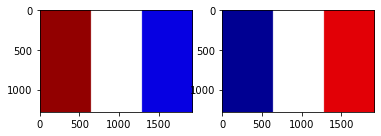

In [44]:
import cv2
img = cv2.imread('Exercise02_France.png', cv2.IMREAD_COLOR)

plt.subplot(121) # Plot before reversion
plt.imshow(img);
plt.subplot(122) # Plot after reversion
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

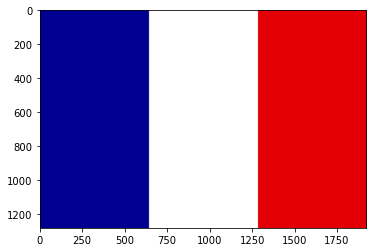

In [49]:
# Anoter way for reversion
img_RGB = img[:,:,[2,1,0]]
plt.imshow(img_RGB);